In [1]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, SpatialDropout1D, Embedding, Activation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ms = pd.read_csv('drive/MyDrive/Colab Notebooks/psy.csv', sep=',')
ms = ms.iloc[:,3:5]
ms[:10]

,content,class
0,"Huh, anyway check out this you[tube] channel: ...",True
1,Hey guys check out my new channel and our firs...,True
2,just for test I have to say murdev.com,True
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,True
4,watch?v=vtaRGgvGtWQ Check this out .﻿,True
5,"Hey, check out my new website!! This site is a...",True
6,Subscribe to my channel ﻿,True
7,i turned it on mute as soon is i came on i jus...,False
8,You should check my channel for Funny VIDEOS!!﻿,True
9,and u should.d check my channel and tell me wh...,True


In [4]:
texts = ms['content'].values
classes = list(ms['class'].values)
maxWordsCount = 60000
print(ms['class'].unique())
nClasses = ms['class'].nunique()+1 
print(nClasses)

[ True False]
3


In [5]:
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ',oov_token='unknown',char_level=False)
tokenizer.fit_on_texts(texts)

xall = tokenizer.texts_to_matrix(texts)

In [6]:
print(tokenizer.word_index.items())

dict_items([('unknown', 1), ('\ufeff', 2), ('the', 3), ('to', 4), ('i', 5), ('and', 6), ('this', 7), ('my', 8), ('you', 9), ('http', 10), ('a', 11), ('check', 12), ('is', 13), ('views', 14), ('com', 15), ('2', 16), ('www', 17), ('of', 18), ('subscribe', 19), ('on', 20), ('out', 21), ('me', 22), ('it', 23), ('video', 24), ('please', 25), ('channel', 26), ('for', 27), ('like', 28), ('so', 29), ('billion', 30), ('in', 31), ('if', 32), ('have', 33), ('https', 34), ('just', 35), ('get', 36), ('can', 37), ('youtube', 38), ('song', 39), ('are', 40), ('be', 41), ('people', 42), ('here', 43), ('how', 44), ('that', 45), ('amp', 46), ('music', 47), ('1', 48), ('image2you', 49), ('ru', 50), ('48051', 51), ('not', 52), ('only', 53), ('new', 54), ('what', 55), ('we', 56), ('at', 57), ('psy', 58), ('guys', 59), ('videos', 60), ('will', 61), ('they', 62), ('there', 63), ('do', 64), ('hey', 65), ('d', 66), ('but', 67), ('facebook', 68), ('your', 69), ('money', 70), ('even', 71), ('has', 72), ('000', 73

In [7]:
print('Размер словаря ',len(tokenizer.word_index.items()))

Размер словаря  1549


In [8]:
encoder = LabelEncoder()
encoder.fit(classes)
classesEncoded = encoder.transform(classes)
print(classesEncoded[:10])


[1 1 1 1 1 1 1 0 1 1]


In [9]:
yall = utils.to_categorical(classesEncoded, nClasses)
print(yall.shape) 
print(yall[0])

(350, 3)
[0. 1. 0.]


In [10]:
xtrain, xval, ytrain, yval = train_test_split(xall, yall, test_size=0.2, shuffle=True)
print(xtrain.shape)
print(ytrain.shape)

(280, 60000)
(280, 3)


In [11]:
Sequences = tokenizer.texts_to_sequences(texts)
npSeque = np.array(Sequences)
xtrainE, xvalE, ytrainE, yvalE = train_test_split(npSeque, yall, test_size=0.2, shuffle=True)
print(xtrainE.shape)
print(ytrainE.shape) 

(280,)
(280, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [12]:
model = Sequential()
model.add(Dense(200, input_dim=maxWordsCount, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(nClasses, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])


Epoch 1/20
12/12 [==============================] - 3s 30ms/step - loss: 1.0455 - accuracy: 0.5250 - val_loss: 0.9484 - val_accuracy: 0.4714
Epoch 2/20
12/12 [==============================] - 0s 11ms/step - loss: 0.7450 - accuracy: 0.6321 - val_loss: 0.5999 - val_accuracy: 0.6857
Epoch 3/20
12/12 [==============================] - 0s 11ms/step - loss: 0.3320 - accuracy: 0.9214 - val_loss: 0.2016 - val_accuracy: 0.9714
Epoch 4/20
12/12 [==============================] - 0s 11ms/step - loss: 0.0842 - accuracy: 0.9929 - val_loss: 0.1346 - val_accuracy: 0.9571
Epoch 5/20
12/12 [==============================] - 0s 12ms/step - loss: 0.0272 - accuracy: 0.9964 - val_loss: 0.1355 - val_accuracy: 0.9571
Epoch 6/20
12/12 [==============================] - 0s 12ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.1140 - val_accuracy: 0.9571
Epoch 7/20
12/12 [==============================] - 0s 11ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.1196 - val_accuracy: 0.9571
Epoch 8/20
12

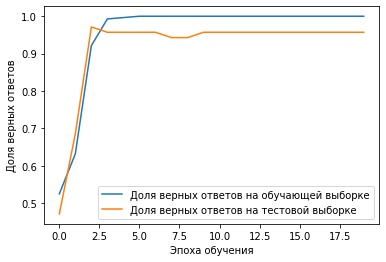

In [13]:
history = model.fit(xtrain, ytrain, epochs=20,batch_size=25,validation_data=(xval,yval))

plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на тестовой выборке')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Получена точность 98,5%